In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = True

In [4]:
data = pd.read_excel('allData.xlsx')

In [5]:
data.head()

,Customer ID,Status,Country,Tier,days_ago_joined,Age,Point,accum_points,points_per_day,days_ago_last_arrived,arrivals_count
0,1820,1,Thailand,Diamond,2364,53,25000,1950,0.82,1655,2
1,1822,1,Malaysia,Jade,2364,38,5000,22020,9.31,342,4
2,1823,1,Australia,Platinum,2364,56,50000,166590,70.47,554,15
3,1824,1,Malaysia,Diamond,2364,45,20000,64825,27.42,38,13
4,1825,1,Singapore,Diamond,2364,41,16000,52119,22.05,206,7


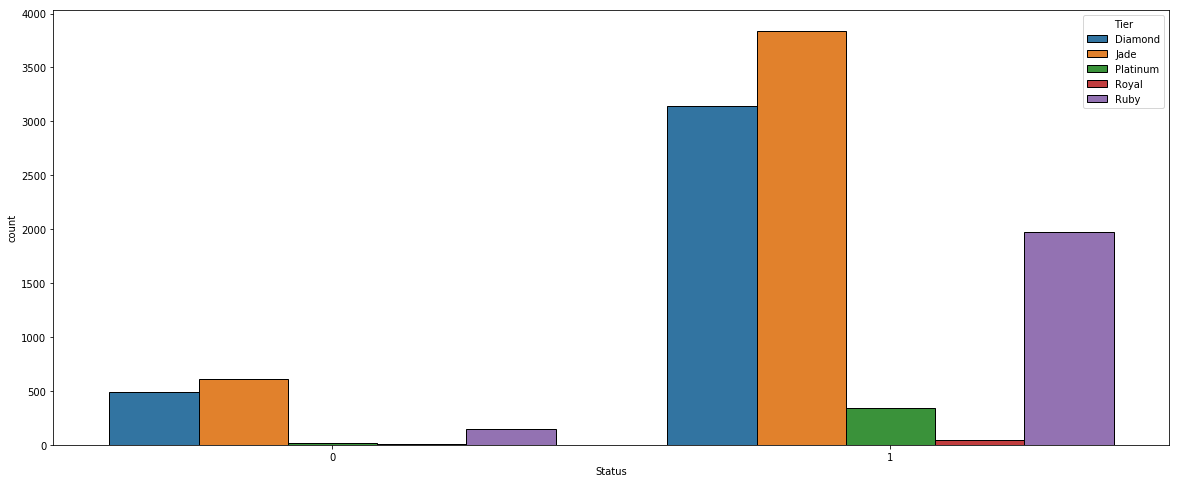

In [6]:
plt.figure(figsize=(20,8))
sns.countplot(x='Status',data=data,hue='Tier')

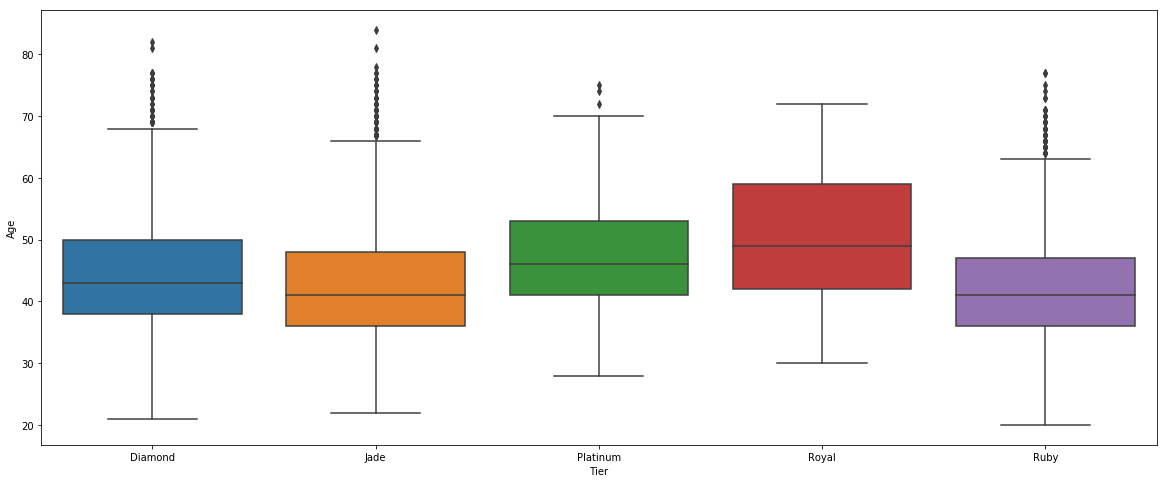

In [7]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Tier',y='Age',data=data)

In [8]:
Tier = pd.get_dummies(data['Tier'])

In [9]:
Country = pd.get_dummies(data['Country'])

In [10]:
Tier.head()

,Diamond,Jade,Platinum,Royal,Ruby
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [11]:
Country.head()

,Australia,China,Hong Kong,Indonesia,Japan,Malaysia,Philippines,Singapore,Taiwan,Thailand,United Arab Emirates,United States of America
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
data = pd.concat([data,Country,Tier],axis=1)

In [13]:
data.head()

,Customer ID,Status,Country,Tier,days_ago_joined,Age,Point,accum_points,points_per_day,days_ago_last_arrived,...,Singapore,Taiwan,Thailand,United Arab Emirates,United States of America,Diamond,Jade,Platinum,Royal,Ruby
0,1820,1,Thailand,Diamond,2364,53,25000,1950,0.82,1655,...,0,0,1,0,0,1,0,0,0,0
1,1822,1,Malaysia,Jade,2364,38,5000,22020,9.31,342,...,0,0,0,0,0,0,1,0,0,0
2,1823,1,Australia,Platinum,2364,56,50000,166590,70.47,554,...,0,0,0,0,0,0,0,1,0,0
3,1824,1,Malaysia,Diamond,2364,45,20000,64825,27.42,38,...,0,0,0,0,0,1,0,0,0,0
4,1825,1,Singapore,Diamond,2364,41,16000,52119,22.05,206,...,1,0,0,0,0,1,0,0,0,0


In [14]:
data.drop(columns=['Country','Tier','Point'],axis=1,inplace=True)

In [15]:
data.head()

,Customer ID,Status,days_ago_joined,Age,accum_points,points_per_day,days_ago_last_arrived,arrivals_count,Australia,China,...,Singapore,Taiwan,Thailand,United Arab Emirates,United States of America,Diamond,Jade,Platinum,Royal,Ruby
0,1820,1,2364,53,1950,0.82,1655,2,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1822,1,2364,38,22020,9.31,342,4,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1823,1,2364,56,166590,70.47,554,15,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1824,1,2364,45,64825,27.42,38,13,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1825,1,2364,41,52119,22.05,206,7,0,0,...,1,0,0,0,0,1,0,0,0,0


In [16]:
X = data.drop(['Status','Customer ID'],axis=1)
y = data['Status']

In [17]:
from sklearn.cross_validation import train_test_split

c:\users\mojiway\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lgModel = LogisticRegression()

In [21]:
lgModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
predictions = lgModel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.40      0.50       361
          1       0.93      0.97      0.95      2822

avg / total       0.90      0.91      0.90      3183



In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test,predictions)

array([[ 145,  216],
       [  71, 2751]], dtype=int64)

In [27]:
coeffs = lgModel.coef_

In [28]:
print(coeffs)

[[-4.59483744e-04  7.18083658e-02  6.62297921e-05  1.35582683e-02
  -2.89924779e-03 -1.90466422e-01  3.49791370e-04 -1.41929882e-02
   1.01000513e-02 -3.40577340e-03  9.60934348e-03  5.65101772e-03
   2.24557143e-03  7.77027565e-03 -3.10030827e-03  1.45851625e-03
   2.27550104e-03  4.07875986e-03 -2.90522075e-02  4.23213340e-02
   9.72633716e-04 -1.48161078e-03  1.00796088e-02]]


In [29]:
intercept = lgModel.intercept_

In [30]:
print(intercept)

[0.02283976]


In [31]:
x =1.00796088e-02
print('%f' %x)

0.010080


In [32]:
data.head()

,Customer ID,Status,days_ago_joined,Age,accum_points,points_per_day,days_ago_last_arrived,arrivals_count,Australia,China,...,Singapore,Taiwan,Thailand,United Arab Emirates,United States of America,Diamond,Jade,Platinum,Royal,Ruby
0,1820,1,2364,53,1950,0.82,1655,2,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1822,1,2364,38,22020,9.31,342,4,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1823,1,2364,56,166590,70.47,554,15,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1824,1,2364,45,64825,27.42,38,13,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1825,1,2364,41,52119,22.05,206,7,0,0,...,1,0,0,0,0,1,0,0,0,0


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()

In [35]:
scale.fit(data.drop(['Status','Customer ID'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
scaled_features = scale.transform(data.drop(['Status','Customer ID'],axis=1))

In [37]:
newDf = pd.DataFrame(scaled_features,columns=data.columns[2:])

In [38]:
newDf.head()

,days_ago_joined,Age,accum_points,points_per_day,days_ago_last_arrived,arrivals_count,Australia,China,Hong Kong,Indonesia,...,Singapore,Taiwan,Thailand,United Arab Emirates,United States of America,Diamond,Jade,Platinum,Royal,Ruby
0,1.897703,1.018975,-0.733236,-0.710453,3.528399,-0.526935,-0.158206,-0.92082,-0.31183,-0.122572,...,-0.297415,-0.186626,2.624166,-0.137209,-0.135775,1.386376,-0.849821,-0.186355,-0.06882,-0.500236
1,1.897703,-0.608368,-0.107052,-0.456516,0.222211,-0.104103,-0.158206,-0.92082,-0.31183,-0.122572,...,-0.297415,-0.186626,-0.381074,-0.137209,-0.135775,-0.721305,1.176719,-0.186355,-0.06882,-0.500236
2,1.897703,1.344444,4.403538,1.372786,0.756035,2.221469,6.320891,-0.92082,-0.31183,-0.122572,...,-0.297415,-0.186626,-0.381074,-0.137209,-0.135775,-0.721305,-0.849821,5.366092,-0.06882,-0.500236
3,1.897703,0.151059,1.228466,0.085156,-0.543274,1.798638,-0.158206,-0.92082,-0.31183,-0.122572,...,-0.297415,-0.186626,-0.381074,-0.137209,-0.135775,1.386376,-0.849821,-0.186355,-0.06882,-0.500236
4,1.897703,-0.282899,0.832038,-0.075462,-0.120243,0.530144,-0.158206,-0.92082,-0.31183,-0.122572,...,3.362306,-0.186626,-0.381074,-0.137209,-0.135775,1.386376,-0.849821,-0.186355,-0.06882,-0.500236


In [39]:
X = newDf
y = data['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
newLgModel = LogisticRegression()


In [40]:
newLgModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
predictions = newLgModel.predict(X_test)

In [42]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.46      0.56       361
          1       0.93      0.98      0.96      2822

avg / total       0.91      0.92      0.91      3183



In [43]:
confusion_matrix(y_test,predictions)

array([[ 165,  196],
       [  60, 2762]], dtype=int64)

In [44]:
newCoeffs = lgModel.coef_

In [45]:
print(newCoeffs)

[[-4.59483744e-04  7.18083658e-02  6.62297921e-05  1.35582683e-02
  -2.89924779e-03 -1.90466422e-01  3.49791370e-04 -1.41929882e-02
   1.01000513e-02 -3.40577340e-03  9.60934348e-03  5.65101772e-03
   2.24557143e-03  7.77027565e-03 -3.10030827e-03  1.45851625e-03
   2.27550104e-03  4.07875986e-03 -2.90522075e-02  4.23213340e-02
   9.72633716e-04 -1.48161078e-03  1.00796088e-02]]


In [47]:
submission = pd.DataFrame({
     "prediction": predictions,
        "Real churn": y_test
       
    })
submission.to_excel('submission_logistic.xlsx', index=False)